<a href="https://colab.research.google.com/github/deva237/DS-Internship/blob/main/bank_transactions_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data** **engineering**

In [ ]:
#1. Import the datset
import pandas as pd
df=pd.read_csv("bank_transactions.csv")
print(df.head(5))

  TransactionID CustomerID CustomerDOB CustGender CustLocation  \
0            T1   C5841053     10/1/94          F   JAMSHEDPUR   
1            T2   C2142763      4/4/57          M      JHAJJAR   
2            T3   C4417068    26/11/96          F       MUMBAI   
3            T4   C5342380     14/9/73          F       MUMBAI   
4            T5   C9031234     24/3/88          F  NAVI MUMBAI   

   CustAccountBalance TransactionDate  TransactionTime  \
0            17819.05          2/8/16           143207   
1             2270.69          2/8/16           141858   
2            17874.44          2/8/16           142712   
3           866503.21          2/8/16           142714   
4             6714.43          2/8/16           181156   

   TransactionAmount (INR)  
0                     25.0  
1                  27999.0  
2                    459.0  
3                   2060.0  
4                   1762.5  


In [ ]:
print(df.isnull().sum())


TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64


In [ ]:
#2. dealing with missing value

# Convert 'CustomerDOB' to datetime objects if it's not already
# df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'], errors='coerce')

# Fill missing dates with a suitable placeholder or strategy (e.g., most frequent date)
# For demonstration, filling with the most frequent date:
# df['CustomerDOB'].fillna(df['CustomerDOB'].mode()[0], inplace=True)

# Handle other columns as needed. Note that mean might not be appropriate for all.
# For example, for 'CustGender' and 'CustLocation', using mode might be more suitable:
df['CustGender'].fillna(df['CustGender'].mode()[0], inplace=True)
df['CustLocation'].fillna(df['CustLocation'].mode()[0], inplace=True)

# For 'CustAccountBalance', mean might be appropriate if it's a numeric column.
df['CustAccountBalance'].fillna((df['CustAccountBalance'].mean()), inplace=True)
print(df.head())

  TransactionID CustomerID CustomerDOB CustGender CustLocation  \
0            T1   C5841053  1994-10-01          F   JAMSHEDPUR   
1            T2   C2142763  2057-04-04          M      JHAJJAR   
2            T3   C4417068  1996-11-26          F       MUMBAI   
3            T4   C5342380  2073-09-14          F       MUMBAI   
4            T5   C9031234  1988-03-24          F  NAVI MUMBAI   

   CustAccountBalance TransactionDate  TransactionTime  \
0            17819.05          2/8/16           143207   
1             2270.69          2/8/16           141858   
2            17874.44          2/8/16           142712   
3           866503.21          2/8/16           142714   
4             6714.43          2/8/16           181156   

   TransactionAmount (INR)  
0                     25.0  
1                  27999.0  
2                    459.0  
3                   2060.0  
4                   1762.5  


In [ ]:
#Dealing with Outliers using Interquantile Range
# Check the data type of the column and convert if necessary
if df['CustAccountBalance'].dtype == object:
    df['CustAccountBalance'] = pd.to_numeric(df['CustAccountBalance'], errors='coerce') # Convert to numeric, replace non-numeric with NaN

# Fill NaN values if any were introduced during conversion
df['CustAccountBalance'].fillna(df['CustAccountBalance'].mean(), inplace=True) # Replace NaN with mean

print(df['CustAccountBalance'])
Q1 = df['CustAccountBalance'].quantile(0.25)
Q3 = df['CustAccountBalance'].quantile(0.75)

IQR = Q3 - Q1
print(IQR)

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

print(upper)
print(lower)

out1=df[df['CustAccountBalance'] < lower].values
out2=df[df['CustAccountBalance'] > upper].values

df['CustAccountBalance'].replace(out1,lower,inplace=True)
df['CustAccountBalance'].replace(out2,upper,inplace=True)

print(df['CustAccountBalance'])

0           17819.05
1            2270.69
2           17874.44
3          866503.21
4            6714.43
             ...    
1048562      7635.19
1048563     27311.42
1048564    221757.06
1048565     10117.87
1048566     75734.42
Name: CustAccountBalance, Length: 1048567, dtype: float64
53466.14
138405.55
-75459.01
0           17819.05
1            2270.69
2           17874.44
3          866503.21
4            6714.43
             ...    
1048562      7635.19
1048563     27311.42
1048564    221757.06
1048565     10117.87
1048566     75734.42
Name: CustAccountBalance, Length: 1048567, dtype: float64


Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount (INR)'],
      dtype='object')


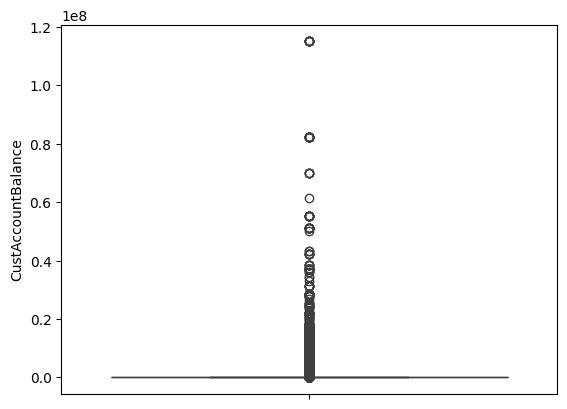

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# Verify the actual column name
print(df.columns)

# Assuming the correct column name is 'TransactionAmount', use:
sns.boxplot(df['CustAccountBalance'])
plt.show()

In [ ]:

# 4. Convert categorical variables into numeric using one-hot encoding
df = pd.get_dummies(df, columns=['CustGender', 'CustLocation'], drop_first=True)

# Verify the conversion
print(df.head())

NameError: name 'pd' is not defined

In [ ]:
import pandas as pd  # Import the pandas library and alias it as 'pd'

# 4. Convert categorical variables into numeric using one-hot encoding
df = pd.get_dummies(df, columns=['CustGender', 'CustLocation'], drop_first=True)

# Verify the conversion
print(df.head())

NameError: name 'df' is not defined

In [ ]:
import pandas as pd  # Import the pandas library and alias it as 'pd'

# Assuming your data is in a CSV file named 'your_data.csv'
df = pd.read_csv('bank_transactions.csv')  # Load your data into a DataFrame named 'df'

# 4. Convert categorical variables into numeric using one-hot encoding
df = pd.get_dummies(df, columns=['CustGender', 'CustLocation'], drop_first=True)

# Verify the conversion
print(df.head())

  TransactionID CustomerID CustomerDOB  CustAccountBalance TransactionDate  \
0            T1   C5841053     10/1/94            17819.05          2/8/16   
1            T2   C2142763      4/4/57             2270.69          2/8/16   
2            T3   C4417068    26/11/96            17874.44          2/8/16   
3            T4   C5342380     14/9/73           866503.21          2/8/16   
4            T5   C9031234     24/3/88             6714.43          2/8/16   

   TransactionTime  TransactionAmount (INR)  CustGender_M  \
0         143207.0                     25.0         False   
1         141858.0                  27999.0          True   
2         142712.0                    459.0         False   
3         142714.0                   2060.0         False   
4         181156.0                   1762.5         False   

   CustLocation_(BENAKA MDTS) BANGALORE  CustLocation_(DT) HOSUR  ...  \
0                                 False                    False  ...   
1                 

In [ ]:
#6. Dealing with class imbalance using SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import pandas as pd # Import pandas to work with DataFrames
from sklearn.impute import SimpleImputer # Import SimpleImputer to handle NaNs

# Load or create your DataFrame here
# Example:
df = pd.read_csv('bank_transactions.csv')  # Replace 'your_data.csv' with your file

# Assuming 'df' is your DataFrame and 'target_variable' is the name of your target variable column
X = df.drop('CustAccountBalance', axis=1)  # Replace 'target_variable' with the actual name
y = df['CustAccountBalance']

threshold = y.mean() # Example threshold, adjust as needed
y = (y > threshold).astype(int) # 1 for high balance, 0 for low

# Identify columns with string values
string_columns = X.select_dtypes(include=['object']).columns

# Handle string columns (choose one or more methods)
# 1. Remove string columns:
# X = X.drop(string_columns, axis=1)

# 2. Encode string columns using LabelEncoder:
for col in string_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# 3. One-hot encode string columns:
# X = pd.get_dummies(X, columns=string_columns)

# Impute missing values in X
imputer = SimpleImputer(strategy='mean') # Replace 'mean' with your preferred strategy
X = imputer.fit_transform(X)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X, y)

# Verify the balancing
print(y_sm.value_counts())

CustAccountBalance
0    291464
1    291464
Name: count, dtype: int64


In [ ]:

# 7. Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_sm = scaler.fit_transform(X_sm)
print(X_sm)

[[-1.73673295  0.34871971 -1.35580397 ... -0.64784939 -0.27677755
  -0.27047032]
 [-0.61815724 -1.22842218  1.21496013 ... -0.64784939 -0.30376503
   3.26074212]
 [ 0.50041847 -0.27423384  0.51434846 ... -0.64784939 -0.28668029
  -0.21568566]
 ...
 [-1.3272613   1.50666469  0.79872905 ...  0.9121351  -0.66099438
  -0.10294129]
 [-1.23090696 -1.45801942  0.06630404 ...  0.84792596  0.91445658
   0.09232598]
 [ 0.40730807 -0.26932943  0.59252776 ... -0.80658599  0.90355776
  -0.17806555]]


In [ ]:
#PCA
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pandas as pd  # Import pandas for handling DataFrames

# Load the dataset into a DataFrame
df = pd.read_csv('bank_transactions.csv')

# Define the features
# Make sure these column names match *exactly* with your CSV file
features = ['CustAccountBalance', 'TransactionDate', 'TransactionTime',
            'CustomerDOB', 'CustGender', 'CustLocation']

# Separate the features (X)
X = df[features]

# Convert 'TransactionDate', 'TransactionTime', and 'CustomerDOB' to numerical values
X['TransactionDate'] = pd.to_datetime(X['TransactionDate']).astype(int) / 10**9
X['TransactionTime'] = pd.to_datetime(X['TransactionTime']).dt.hour  # Assuming time in hh:mm:ss format
X['CustomerDOB'] = pd.to_datetime(X['CustomerDOB']).astype(int) / 10**9

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Fill any remaining NaN values in the entire DataFrame 'X'
X.fillna(X.mean(), inplace=True)  # Fill NaN with the mean of each column

# Check if there are still any NaN values after preprocessing
if X.isnull().any().any():
    print("Warning: There are still NaN values in the data. Consider further preprocessing.")
    # You might want to investigate why these NaNs remain and apply more specific handling.

# Apply PCA to reduce the dimensionality of the features
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

print(X_pca)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_pca)

# Print the cluster labels
print(kmeans.labels_)

<ipython-input-1-e439cfb8ebec>:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X['TransactionDate'] = pd.to_datetime(X['TransactionDate']).astype(int) / 10**9
<ipython-input-1-e439cfb8ebec>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['TransactionDate'] = pd.to_datetime(X['TransactionDate']).astype(int) / 10**9
<ipython-input-1-e439cfb8ebec>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

[0.92572754 0.00758635 0.01122779 0.02787425 0.00291974 0.02466433]


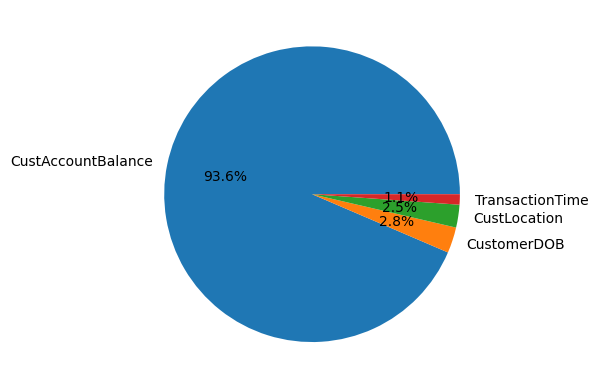

In [ ]:
#Feature Selection

from sklearn.ensemble import ExtraTreesRegressor # Use Regressor for continuous target
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset into a DataFrame (if not already loaded)
df = pd.read_csv('bank_transactions.csv')

# Define the features
features = ['CustAccountBalance', 'TransactionDate', 'TransactionTime',
            'CustomerDOB', 'CustGender', 'CustLocation']

# Separate the features (X)
X = df[features]

model = ExtraTreesRegressor() # Change to ExtraTreesRegressor

# Assuming X contains categorical features, encode them using LabelEncoder
le = LabelEncoder()
X_encoded = X.apply(le.fit_transform)

# Define your target variable 'Y'
Y = df['CustAccountBalance']

# Handle missing values in the target variable 'Y' (if needed)
Y = Y.fillna(Y.mean())

model.fit(X_encoded,Y)
print(model.feature_importances_)

feat_importance = pd.Series(model.feature_importances_, index=X_encoded.columns)
feat_importance.nlargest(4).plot(kind='pie', autopct='%1.1f%%')
plt.show()

## **ML** **CLASSIFICATION**

In [ ]:
#4. Decision Tree

from sklearn import tree
from sklearn.metrics import mean_squared_error # Use an appropriate metric for regression
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset into a DataFrame (if not already loaded)
df = pd.read_csv('bank_transactions.csv')

# Define the features
features = ['CustAccountBalance', 'TransactionDate', 'TransactionTime',
            'CustomerDOB', 'CustGender', 'CustLocation']

# Separate the features (X)
X = df[features]

model = ExtraTreesRegressor() # Change to ExtraTreesRegressor

# Assuming X contains categorical features, encode them using LabelEncoder
le = LabelEncoder()
X_encoded = X.apply(le.fit_transform)
# Define your target variable 'Y'
Y = df['CustAccountBalance']

# Handle missing values in the target variable 'Y' (if needed)
Y = Y.fillna(Y.mean())

# Use DecisionTreeRegressor for continuous target
dt = tree.DecisionTreeRegressor()

X_train,X_test,y_train,y_test=train_test_split(X_encoded,Y,random_state=0,test_size=0.3)

train=dt.fit(X_train,y_train)

y_pred=dt.predict(X_test)

# Evaluate using a regression metric (e.g., mean squared error)
print(mean_squared_error(y_test,y_pred))

24597376.760520563


# **DATA** **VISUALIZATION**

In [ ]:
import pandas as pd              #pd is an Alias
from matplotlib import pyplot as plt
import seaborn as sns


df=pd.read_csv("bank_transactions.csv")

#Preparing X and Y

X = df.drop('CustomerID', axis=1)
X = X.drop('CustAccountBalance', axis=1)
Y = df['CustAccountBalance']

Columns in DataFrame:
Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount '],
      dtype='object')


<ipython-input-18-c64ae0773eaf>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='TransactionTime', y='CustAccountBalance', data=df, ci=None)  # ci=None disables error bars


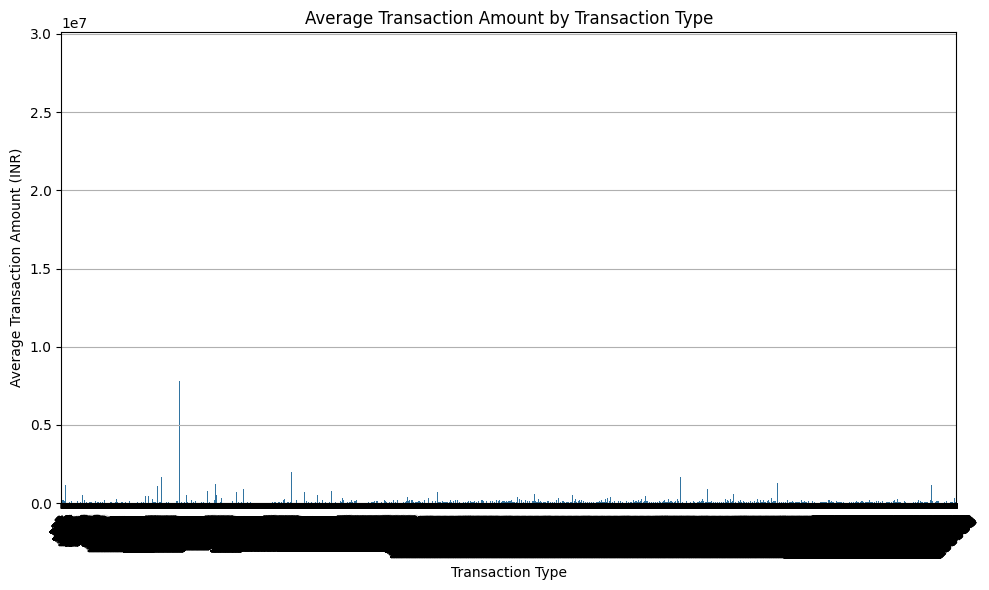

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the bank transactions dataset into a DataFrame
df = pd.read_csv('bank_transactions.csv')

# Print columns to verify names and presence
print("Columns in DataFrame:")
print(df.columns)

# Plotting the bar plot using seaborn
plt.figure(figsize=(10, 6))  # Optional: Adjust figure size
sns.barplot(x='TransactionTime', y='CustAccountBalance', data=df, ci=None)  # ci=None disables error bars
plt.title('Average Transaction Amount by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Average Transaction Amount (INR)')
plt.grid(axis='y')  # Optional: Add horizontal grid lines
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Optional: Adjust layout to prevent clipping of labels
plt.show()


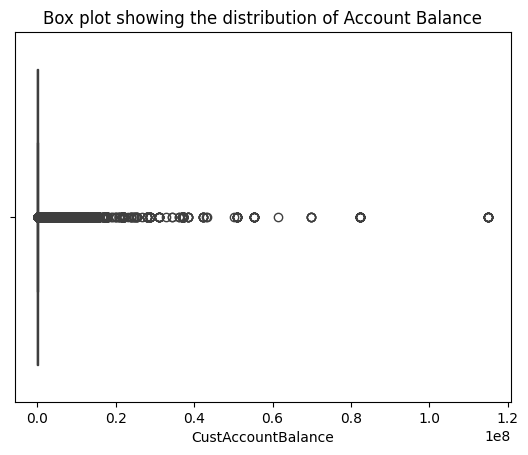

In [ ]:
sns.boxplot(x='CustAccountBalance', data = df) #if x horizontal and if y vertical
plt.title("Box plot showing the distribution of Account Balance")
plt.show()

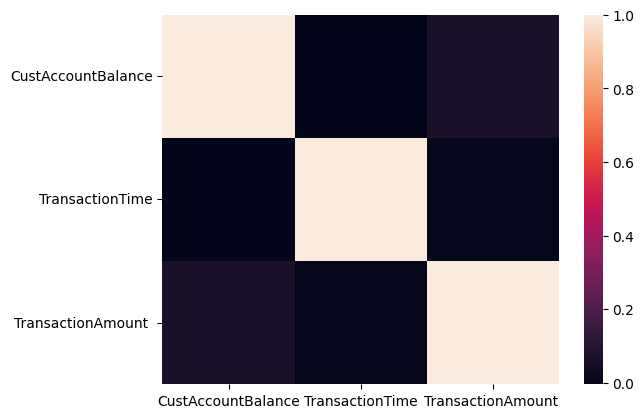

In [ ]:
numeric_df = df.select_dtypes(include=['number']) # Select only numeric columns for correlation calculation
sns.heatmap(numeric_df.corr())
plt.show()

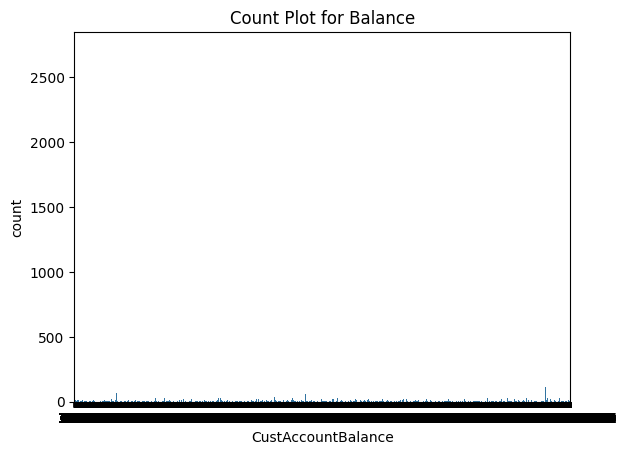

In [ ]:
#Count Plot s similar to a bar plot except that we only pass the X-axis and Y-axis represents explicitly counting the number of occurrences. Each bar represents count for each category of species.
sns.countplot(x='CustAccountBalance', data = df)
plt.title("Count Plot for Balance")
plt.show()